In [ ]:
#!pip install nltk

## EDA ON GULF TWEETS

In [4]:
import nltk

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
pd.options.display.max_colwidth = 75

In [ ]:
pwd

### Instantiate cleaned pickles

In [5]:
df_batch_1 = pd.read_pickle('../gulf_twitter_pickled/stream_مغسلة.p')

### Identify most frequent `locations` and `names`

In [6]:
df_batch_1.cleaned_geo.value_counts().head()

None                            88
Saudi Arabia                    55
Kuwait                           4
Riyadh | للإعلان التواصل خاص     4
مومباي/ الهند                    3
Name: cleaned_geo, dtype: int64

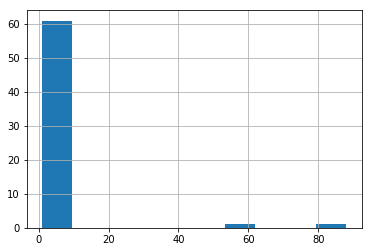

In [9]:
df_batch_1.cleaned_geo.value_counts().hist()

In [7]:
df_batch_1.cleaned_name.value_counts().head()

Dahan_Co        4
nissoo58        4
shbr11          4
Ask_Almadina    4
Ask_Riyadh1     4
Name: cleaned_name, dtype: int64

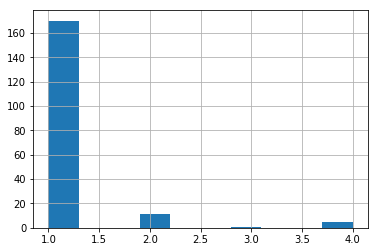

In [8]:
df_batch_1.cleaned_name.value_counts().hist()

In [10]:
df_batch_1.cleaned_geo.unique()

array(['None', 'بِدبِد - SQU - معبيلة سيتي', 'وطني الغالي', 'Saudi Arabia',
       '', 'khobar ksa - akkar lebanon', 'مومباي/ الهند',
       'في قلبها ... في قلبه', 'ليبيا', 'جــــــــــــدة',
       'Riyadh | للإعلان التواصل خاص', 'مومباي . الهند',
       'سكاكا, المملكة العربية السعودية', 'BAHA, Kingdom of Saudia Arabia',
       'abn-Alkuwait', 'Kuwait - الكويت', 'Saudi , Riyadh', 'Gaza',
       'القصيم', 'الرياض، جدة | دبي، أبوظبي',
       'مكة المكرمة, المملكة العربية السعودية', 'القصيم-الشماسية',
       'الدمام, المملكة العربية السعودية', 'In the middle of nowhere',
       'المدينة المنورة', 'Makkah Al Mukarrama, Kingdom of Saudi Arabia',
       'الخبر', 'لقائنا في الجنة بإذن الله', 'ينبع الهويّة والهوى',
       'Maßbach, Deutschland', 'Saudi Arabia, Riyadh', 'Libya',
       'مش_عربية.', 'جدة ..حقنا', 'Jeddah, Saudi Arabia',
       ', المملكة العربية السعودية', 'مكة المكرمة, المملكة العربية ا',
       'حيـث أگون', 'Al ain/ AbuDhabi', 'United States', 'حيث أكون',
       'Kuwait', '

In [23]:
df_batch_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 389
Data columns (total 3 columns):
cleaned_text    215 non-null object
cleaned_name    215 non-null object
cleaned_geo     215 non-null object
dtypes: object(3)
memory usage: 6.7+ KB


In [55]:
df_batch_1.cleaned_name.nunique()

187

__Finding users with highest lexical diversity scores to add them to timelines search__

In [11]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [58]:
#creating cleaned text score in a new column
df_batch_1['cleaned_text_score'] = df_batch_1['cleaned_text'].map(lambda x: lexical_diversity(x))

In [76]:
#creating length of cleaned text in a new column to remove short tweets w/high lexical diversity score
df_batch_1['cleaned_text_len'] = df_batch_1['cleaned_text'].map(lambda x: len(x))

In [81]:
#creating mask of tweets w/ lexical diversity scores over 0.4
df_highest_user_scores = df_batch_1.loc[df_batch_1['cleaned_text_score'] >= 0.4, ['cleaned_name','cleaned_text_score', 'cleaned_text', 'cleaned_text_len']]

In [93]:
#adding mask to exclude tweets under 40 characters
df_highest_user_scores[(df_highest_user_scores['cleaned_text_score'] >= 0.40) 
                         & (df_highest_user_scores['cleaned_text_len'] >= 40)].head(10)

,cleaned_name,cleaned_text_score,cleaned_text,cleaned_text_len
1,CupsOfKarak,0.422222,حتى هندي مال مغسلة قال لي تدرس هندسة وحده عرف,45
14,_Riyadh,0.439560,مركز مغسلة فومي للسيارات *عندهم خصومات طيبة تب...,91
16,al3nbari,0.423077,: ياقو قلبك ياشيخ كيف تدخل مغسلة اموات في مكان...,52
111,audi_nnn,0.409091,شوف دورات مياه مواقف كدي مغسلة سيارات البرما,44
115,ragksa2,0.450000,مغسلة سيارات متنقلة حفرالباطن و القيصومة,40
145,Ask_Almadina,0.431818,مـﻧـــ الخاصــــ احسن مغسلة مفارش فالمدينة ؟,44
205,amalnaseraa,0.431818,: يلحسوها لك لحاس... عماني يمدح مغسلة سيارات,44
206,mnoor496,0.434783,بسالك الحوطه فيها مغسلة ملابس بخار ووين موقعها,46
237,a20002af,0.489362,مغسلة عند شقق عزابيه ، كوفي بمحطه ع طريق سريع ،,47
270,almazroui_sam,0.458333,خل عنك الجو طارق و تعال شلني من عند مغسلة المحطه,48


In [91]:
df_highest_user_scores.sort_values('cleaned_text_score', ascending=False).head()

,cleaned_name,cleaned_text_score,cleaned_text,cleaned_text_len
383,AboYasser137,1.000000,…,1
334,fjs2001,0.916667,مغسلة الجوري,12
201,BaderKurdi,0.916667,مغسلة قطارات,12
44,sa_sa765h,0.909091,مغسلة الجبر,11
39,ALSHAREEF__LY,0.888889,اول مغسلة,9


### Conduct EDA on tweets

In [112]:
word_list = [word for line in df_batch_1['cleaned_text'] for word in line.split()]

In [147]:
word_list[:5]

['شوف', 'لك', 'مغسلة', 'سيارات', 'قبل']

In [114]:
word_list.count('مغسلة')

182

In [115]:
len(word_list)

3235

In [116]:
vocab = set(word_list)
vocab_size = len(vocab)
vocab_size

1378

In [117]:
from nltk.text import Text  

In [ ]:
text_eda = Text(word_list)

In [125]:
def percentage(count, total):
    return 100 * count / total

In [126]:
percentage(text_eda.count('مغسلة'), len(text_eda))

5.62596599690881

In [118]:
text_eda.concordance("مغسلة")

Displaying 25 of 182 matches:
                                     مغسلة سيارات قبل يحرقوها عليك حتى هندي مال
                                     مغسلة قال لي تدرس هندسة وحده عرف يتعطل عند
 تدرس هندسة وحده عرف يتعطل عندك خلاط مغسلة تروح مكتب مؤسسة صيانة يستقبلك صاحب ا
تب سعودي تتفق معه وتأخذ… مخطط من بعد مغسلة الضاحي مغسلة طيبه الاوتوماتيكيه اسعا
 معه وتأخذ… مخطط من بعد مغسلة الضاحي مغسلة طيبه الاوتوماتيكيه اسعارهم حلوه مغسل
غسلة طيبه الاوتوماتيكيه اسعارهم حلوه مغسلة مركبة بمسمارين و شوية سيلكون مصيرها 
 استثماري في اليمن..؟ قال :احسن… فيه مغسلة في مخطط الملك فهد، جنب محطة الوصابي 
ونها صدقة ، بس للاسف ان… : شباب فتحت مغسلة سيارات لغسل السيارة من الداخل والخار
 لما كبرو شوفو الي واقفين بالدور عند مغسلة السيارات بمحطات الوق… مركز مغسلة فوم
عند مغسلة السيارات بمحطات الوق… مركز مغسلة فومي للسيارات *عندهم خصومات طيبة تبد
 Jeddah … : ياقو قلبك ياشيخ كيف تدخل مغسلة اموات في مكان مهجور 🤐🤐 يَــب قصدك ال
هم شي تكون ماركة ونظيفة ولا السيجارة مغسلة يدي وقلبي أين أجد مغسلة تقوم بغسل مر
ولا السيجا

In [119]:
from nltk import FreqDist

In [120]:
fdist1 = FreqDist(text_eda)

In [121]:
vocabulary1 = list(fdist1.keys())
vocabulary1[:10]

['شوف',
 'لك',
 'مغسلة',
 'سيارات',
 'قبل',
 'يحرقوها',
 'عليك',
 'حتى',
 'هندي',
 'مال']

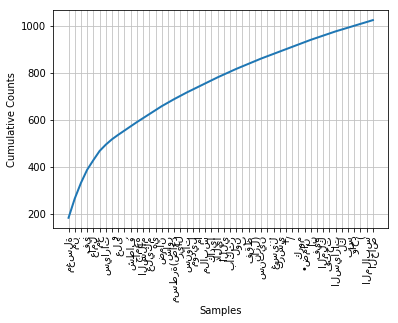

In [122]:
fdist1.plot(50, cumulative=True)

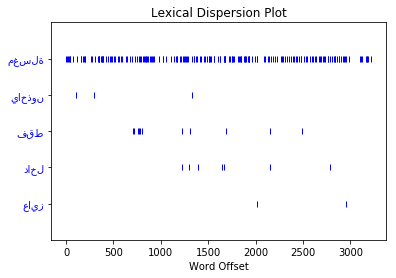

In [123]:
text_eda.dispersion_plot([u"مغسلة", "ياخذون", "فقط", "داخل", "عايز"])

In [124]:
text_eda.similar("مغسلة")

نظافة معماري الجبس استراحة منزلي القطعه عادي مزارع مطعم


In [127]:
sorted([w for w in set(word_list) if len(w) > 2 and fdist1[w] > 10])

['السلام',
 'اللي',
 'بأكثر',
 'جامعة',
 'داليا',
 'ريال',
 'سنتين',
 'سنوات',
 'سيارات',
 'شاور',
 'شطاف',
 'ضمان',
 'عامل',
 'على',
 'عليكم',
 'فقط',
 'كاديا',
 'لون',
 'مسطرة(صاعد',
 'مغسلة',
 'ملابس',
 'موديل',
 'نازل)']

In [134]:
word_length = [len(w) for w in text_eda]

In [136]:
word_length[:10]

[3, 2, 5, 6, 3, 7, 4, 3, 4, 3]

In [137]:
fdist = FreqDist([len(w) for w in text_eda])

In [138]:
print(fdist)

<FreqDist with 15 samples and 3235 outcomes>


In [139]:
fdist.items()

dict_items([(3, 404), (2, 364), (5, 859), (6, 354), (7, 194), (4, 690), (13, 2), (8, 97), (1, 210), (9, 33), (11, 5), (14, 2), (10, 17), (21, 2), (12, 2)])

In [132]:
fdist.max()

5

In [133]:
fdist.freq(2)

0.1125193199381762